# Data and Setup San Diego Water Quality 2011-2019


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline() #allows cufflinks to work offline
init_notebook_mode(connected=True) #connects notebook to something

In [2]:
import plotly.graph_objects as go

In [3]:
sd_wq = pd.read_csv('water_quality_2011_2019_datasd.csv')
sd_tst = pd.read_csv('reference_stations_water_quality.csv')

In [4]:
sd_wq.info() #338978 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample       338978 non-null  int64  
 1   station      338978 non-null  object 
 2   depth_m      309084 non-null  float64
 3   date_sample  338978 non-null  object 
 4   time         323266 non-null  object 
 5   project      338978 non-null  object 
 6   parameter    338978 non-null  object 
 7   qualifier    107545 non-null  object 
 8   value        338308 non-null  float64
 9   units        338978 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.9+ MB


We can see that there are 338,978 rows, and 13 columns, have to be careful about graphs, large dataset

In [5]:
sd_wq.head()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL


In [6]:
sd_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  155 non-null    object 
 1   lat      155 non-null    float64
 2   long     155 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [7]:
sd_tst[sd_tst['station']=='D7']

,station,lat,long
17,D7,32.7193,-117.25728


# Basic Questions

In [8]:
print('There are {} parameters which are {}'.format(sd_wq['parameter'].nunique(),sd_wq['parameter'].unique()))
print('There are {} stations labeled {}'.format(sd_wq['station'].nunique(),sd_wq['station'].unique()))
print('There are {} different depths measured at'.format(sd_wq['depth_m'].nunique()))
print('There are {} sample dates'.format(sd_wq['date_sample'].nunique()))
print('There are {} projects which are {}'.format(sd_wq['project'].nunique(),sd_wq['project'].unique()))

There are 12 parameters which are ['ENTERO' 'FECAL' 'TOTAL' 'CHLOROPHYLL' 'DENSITY' 'DO' 'PH' 'SALINITY'
 'TEMP' 'XMS' 'OG' 'SUSO']
There are 105 stations labeled ['I25' 'I26' 'S10' 'S11' 'S4' 'S5' 'D10' 'D11' 'D12' 'D4' 'D5' 'D7' 'D8'
 'D9' 'I28' 'I29' 'I30' 'I31' 'I32' 'I33' 'I34' 'I35' 'I36' 'I37' 'I38'
 'I12' 'I14' 'I15' 'I16' 'I17' 'I18' 'I19' 'I22' 'I23' 'I24' 'I27' 'I39'
 'I40' 'S0' 'S12' 'S2' 'S3' 'S6' 'S8' 'S9' 'I1' 'I10' 'I11' 'I13' 'I2'
 'I20' 'I21' 'I3' 'I4' 'I5' 'I6' 'I7' 'I8' 'I9' 'A1' 'A6' 'A7' 'C4' 'C5'
 'C6' 'C7' 'C8' 'F01' 'F02' 'F03' 'F04' 'F05' 'F06' 'F07' 'F08' 'F09'
 'F10' 'F11' 'F12' 'F13' 'F14' 'F15' 'F16' 'F17' 'F18' 'F19' 'F20' 'F21'
 'F22' 'F23' 'F24' 'F25' 'F26' 'F27' 'F28' 'F29' 'F30' 'F31' 'F32' 'F33'
 'F34' 'F35' 'F36' 'D8-A' 'D8-B']
There are 16 different depths measured at
There are 1700 sample dates
There are 2 projects which are ['SBOO' 'PLOO']


There are 12 different parameters that are measured, 105 different stations, 16 depths and 1700 dates sampled

In [9]:
print('The largest water quality reading was found at \n{}'.format(
    sd_wq.iloc[sd_wq['value'].argmax()]))

The largest water quality reading was found at 
sample           1506161862
station                  S0
depth_m                 NaN
date_sample      2015-06-16
time           11:10:00 PST
project                SBOO
parameter             TOTAL
qualifier                 e
value                180000
units            CFU/100 mL
Name: 173899, dtype: object


In [10]:
print('The highest temperature reading was found at \n{}'.format
      (sd_wq[sd_wq['parameter']=='TEMP'].iloc[
        sd_wq[sd_wq['parameter']=='TEMP']['value'].argmax()]
      )
     )

The highest temperature reading was found at 
sample          1808065363
station                 A6
depth_m                  1
date_sample     2018-08-06
time           8:09:00 PST
project               PLOO
parameter             TEMP
qualifier              NaN
value                25.54
units                    C
Name: 289313, dtype: object


Where are the testing locations

In [11]:
fig = go.Figure(data=go.Scattergeo(
        lon = sd_tst['long'],
        lat = sd_tst['lat'],
        text = sd_tst['station'],
        mode = 'markers',
        marker_color = 'coral',
        ))

fig.update_layout(
        title = 'San Diego Water Quality Testing Locations<br>(Hover for station ID)',
        geo_scope='north america',
    )
fig.show()

# Creating new features

In [12]:
sd_wq['date_sample']=pd.to_datetime(sd_wq['date_sample'])

Creating new columns with year month and date

In [13]:
sd_wq['year'] = sd_wq['date_sample'].apply(lambda x:x.year)
sd_wq['month'] = sd_wq['date_sample'].apply(lambda x:x.month)
sd_wq['date'] = sd_wq['date_sample'].apply(lambda x:x.date())

In [14]:
sd_wq.head()

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,year,month,date
0,101111769,I25,2.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,e,24.0,CFU/100 mL,2011,1,2011-01-01
1,101111770,I25,6.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,110.0,CFU/100 mL,2011,1,2011-01-01
2,101111771,I25,9.0,2011-01-01,11:54:00 PST,SBOO,ENTERO,NaN,100.0,CFU/100 mL,2011,1,2011-01-01
3,101111772,I26,6.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,94.0,CFU/100 mL,2011,1,2011-01-01
4,101111773,I26,9.0,2011-01-01,12:04:00 PST,SBOO,ENTERO,NaN,400.0,CFU/100 mL,2011,1,2011-01-01


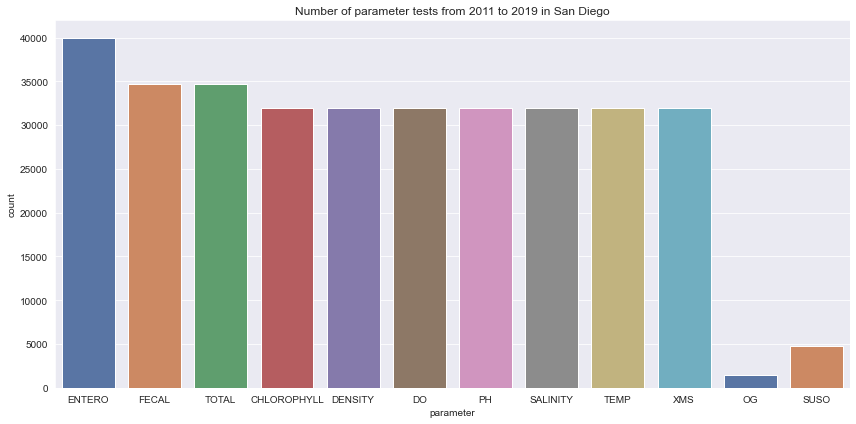

In [15]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.countplot(x='parameter',data=sd_wq,palette = 'deep')
plt.title('Number of parameter tests from 2011 to 2019 in San Diego')
plt.tight_layout()

In [16]:
sd_wq.info() #Want to see what type our dates are (year, month, date) - We want datetime objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338978 entries, 0 to 338977
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sample       338978 non-null  int64         
 1   station      338978 non-null  object        
 2   depth_m      309084 non-null  float64       
 3   date_sample  338978 non-null  datetime64[ns]
 4   time         323266 non-null  object        
 5   project      338978 non-null  object        
 6   parameter    338978 non-null  object        
 7   qualifier    107545 non-null  object        
 8   value        338308 non-null  float64       
 9   units        338978 non-null  object        
 10  year         338978 non-null  int64         
 11  month        338978 non-null  int64         
 12  date         338978 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 33.6+ MB


Want to see time series of TOTAL Bacteria at different stations

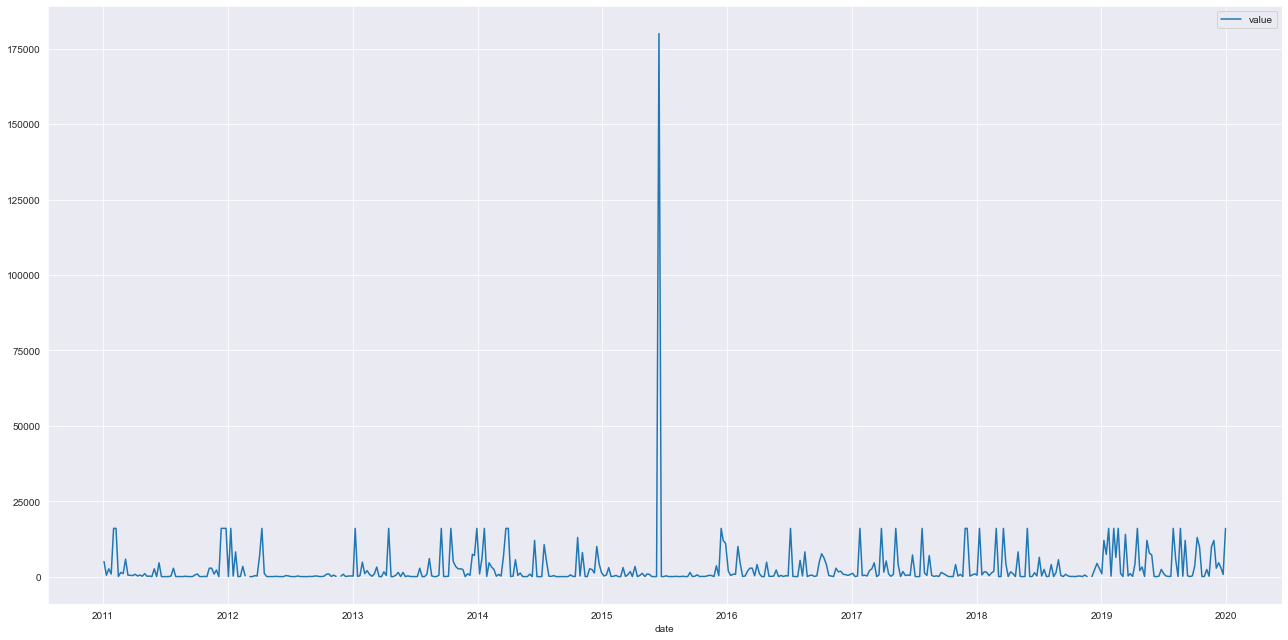

In [17]:
#sd_wq[(sd_wq['parameter']=='TOTAL')].plot.line(x='date',y='value', figsize = (18,9))
sd_wq[(sd_wq['parameter']=='TOTAL') & (sd_wq['station']=='S0')].plot.line(x='date',y='value', figsize = (18,9))
plt.tight_layout()
#.plot.line(x = sd_wq['date'],y='value')


In [18]:
sd_wq[(sd_wq['station']=='S0')]['value'].describe() 

count      1398.000000
mean       1327.552217
std        5704.534500
min           2.000000
25%          10.000000
50%          74.000000
75%         560.000000
max      180000.000000
Name: value, dtype: float64

In [19]:
sd_wq[(sd_wq['parameter']=='TOTAL') & (sd_wq['station']=='S0')|(sd_wq['station']=='D7')].iplot(kind='scatter',x='date',y='value')

# Statistical Analysis

I want to group my data by Month (row) and Station ID (Column) with describe level of statistics (mean, mode, Quartiles) for each station Id at each month

In [20]:
# Unstack method 
#For correlations, every value in our matrix needs to be a single value that relates a row and column ID 

In [22]:
sd_stat = sd_wq.groupby(by=['month','station']).count()
sd_stat

sample  depth_m  date_sample  time  project  parameter  \
month station                                                           
1     A1         1320     1320         1320  1320     1320       1320   
      A6         1321     1321         1321  1321     1321       1321   
      A7         1320     1320         1320  1320     1320       1320   
      C4         1320     1320         1320  1320     1320       1320   
      C5         1320     1320         1320  1320     1320       1320   
...               ...      ...          ...   ...      ...        ...   
12    S4          187        0          187   187      187        187   
      S5          222        0          222   222      222        222   
      S6          150        0          150   150      150        150   
      S8          120        0          120   120      120        120   
      S9          120        0          120   120      120        120   

               qualifier  value  units  year  date  
month station                                       
1     A1             388   1320   1320  1320  1320  
      A6             389   1321   1321  1321  1321  
      A7             388   1320   1320  1320  1320  
      C4             396   1320   1320  1320  1320  
      C5             396   1320   1320  1320  1320  
...                  ...    ...    ...   ...   ...  
12    S4             127    183    187   187   187  
      S5             171    218    222   222   222  
      S6             128    150    150   150   150  
      S8             120    120    120   120   120  
      S9             119    120    120   120   120  

[1008 rows x 11 columns]

In [30]:
sd_stat = sd_wq.groupby(by=['month','station']).count()['value'].unstack()
print(sd_stat)
sd_stat.info()

station      A1      A6      A7      C4      C5      C6      C7      C8  \
month                                                                     
1        1320.0  1321.0  1320.0  1320.0  1320.0  1320.0  1319.0  1318.0   
2        1232.0  1229.0  1229.0  1230.0  1230.0  1227.0  1228.0  1229.0   
3        1293.0  1290.0  1291.0  1260.0  1260.0  1257.0  1287.0  1287.0   
4        1351.0  1347.0  1349.0  1349.0  1348.0  1350.0  1350.0  1350.0   
5        1290.0  1290.0  1290.0  1290.0  1290.0  1290.0  1283.0  1288.0   
6        1254.0  1254.0  1253.0  1254.0  1251.0  1254.0  1254.0  1254.0   
7        1311.0  1328.0  1328.0  1329.0  1329.0  1328.0  1323.0  1329.0   
8        1279.0  1287.0  1284.0  1287.0  1287.0  1287.0  1285.0  1286.0   
9        1290.0  1290.0  1290.0  1290.0  1290.0  1288.0  1289.0  1290.0   
10       1350.0  1350.0  1349.0  1350.0  1350.0  1350.0  1350.0  1350.0   
11       1257.0  1256.0  1257.0  1260.0  1260.0  1253.0  1271.0  1256.0   
12       1259.0  1263.0  

<AxesSubplot:xlabel='station', ylabel='month'>

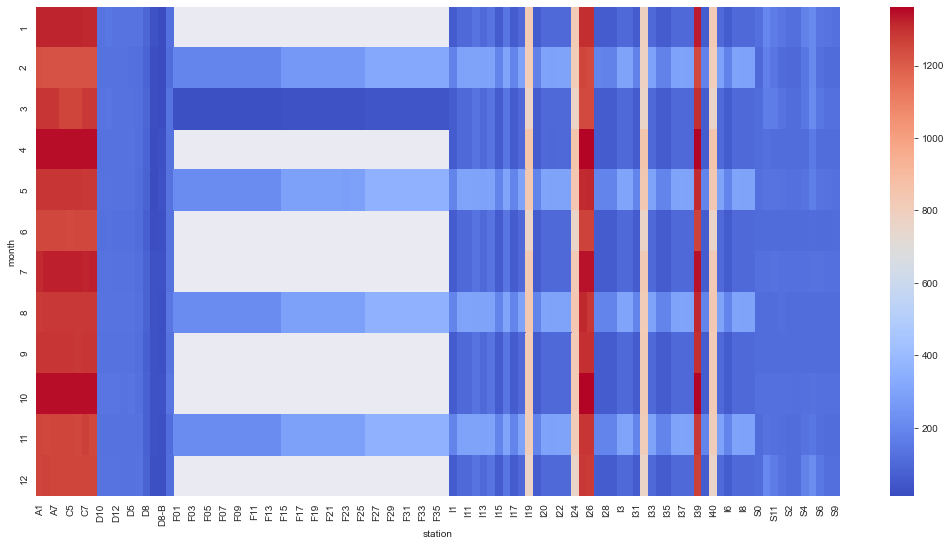

In [31]:
plt.figure(figsize=(18,9))
sns.heatmap(sd_stat,cmap='coolwarm')

# Scratch Below

In [19]:
sd_wq.groupby('parameter').mean()

,sample,depth_m,value,year,month
parameter,,,,,
CHLOROPHYLL,1.421044e+09,14.197681,2.769010,2014.867095,6.503040
DENSITY,1.421044e+09,14.197681,24.712218,2014.867095,6.503040
DO,1.421044e+09,14.197681,7.227980,2014.867095,6.503040
ENTERO,1.423312e+09,14.080214,85.635709,2014.963605,6.483467
FECAL,1.421690e+09,8.552792,105.061069,2014.952279,6.482339
OG,1.157372e+09,2.000000,0.372596,2013.091892,6.500000
PH,1.421044e+09,14.197681,8.093799,2014.867095,6.503040
SALINITY,1.421044e+09,14.197681,33.496282,2014.867095,6.503040
SUSO,1.153459e+09,11.323255,3.802852,2013.064195,6.468627


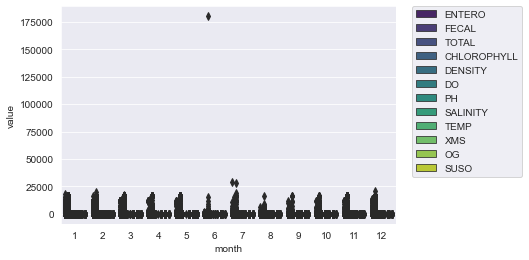

In [21]:
sns.boxplot(x='month',y='value',data=sd_wq,hue='parameter',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
sd_wq.groupby('parameter')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
CHLOROPHYLL,31884.0,2.769010,4.325919,0.000,0.8200,1.470,2.950,74.640
DENSITY,31895.0,24.712218,0.663629,22.328,24.3295,24.754,25.150,27.066
DO,31886.0,7.227980,1.457982,0.250,6.5100,7.570,8.140,14.470
ENTERO,39839.0,85.635709,851.322689,2.000,2.0000,2.000,2.000,29000.000
FECAL,34584.0,105.061069,924.945968,1.000,2.0000,2.000,2.000,15000.000
OG,1479.0,0.372596,0.924049,0.000,0.2000,0.200,0.200,22.600
PH,31792.0,8.093799,0.142881,7.550,8.0200,8.120,8.180,8.700
SALINITY,31810.0,33.496282,0.144502,32.095,33.3940,33.503,33.589,34.274
SUSO,4828.0,3.802852,3.406792,0.200,1.9800,3.240,4.900,49.000


<AxesSubplot:xlabel='year', ylabel='value'>

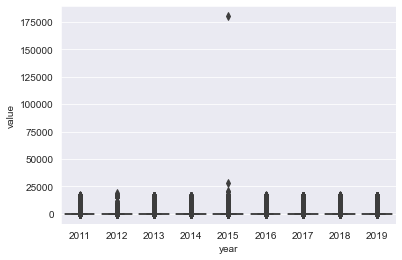

In [24]:
sns.boxplot(x='year',y='value',data=sd_wq[sd_wq['parameter']=='TOTAL'])
#plt.xlim(-100,100)

In [20]:
print(sd_wq.loc[                               #uSING .loc for location 
    sd_wq[sd_wq['parameter']=='TOTAL']['value'].idxmax()] # Location of highgest total FECAL +Coliform reading
      [['date_sample','station']] #pulling date and station of that reading
     ) 

sd_wq.loc[sd_wq[sd_wq['parameter']=='PH']['value'].idxmax()]

date_sample    2015-06-16 00:00:00
station                         S0
Name: 173899, dtype: object


sample                  1208135223
station                        I27
depth_m                         18
date_sample    2012-08-13 00:00:00
time                           NaN
project                       SBOO
parameter                       PH
qualifier                      NaN
value                          8.7
units                           pH
year                          2012
month                            8
date                    2012-08-13
Name: 67103, dtype: object